In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DASH-USD
Start: 2021-01-22 16:30:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1363 
Tsesting data: 1364 


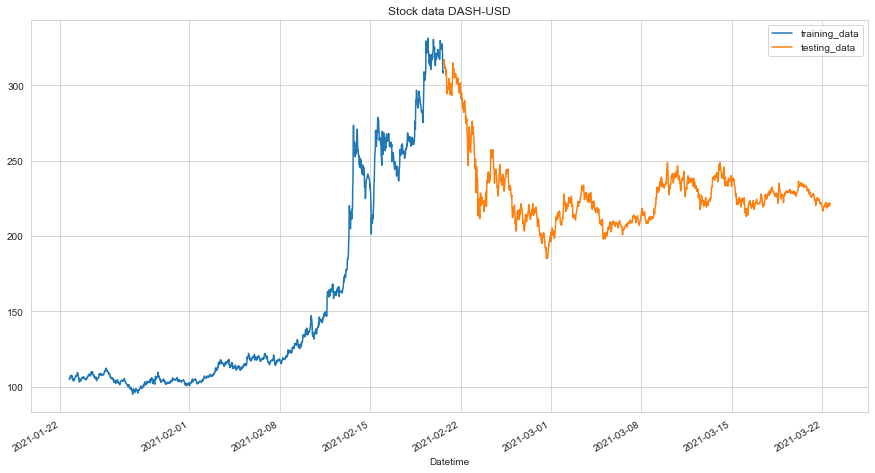

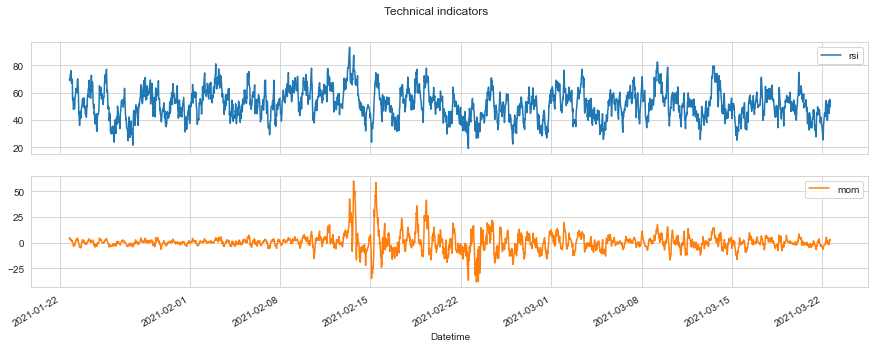

In [2]:
stock_name = 'dash-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1512.45, duration: 0:00:00.243076
episode: 2/2000, episode end value: 1536.64, duration: 0:00:00.252050
episode: 3/2000, episode end value: 1539.48, duration: 0:00:00.251056
episode: 4/2000, episode end value: 1541.78, duration: 0:00:00.244055
episode: 5/2000, episode end value: 1543.07, duration: 0:00:00.250070
episode: 6/2000, episode end value: 1542.27, duration: 0:00:00.242529
episode: 7/2000, episode end value: 1539.82, duration: 0:00:00.244419
episode: 8/2000, episode end value: 1541.16, duration: 0:00:00.242192
episode: 9/2000, episode end value: 1539.54, duration: 0:00:00.240053
episode: 10/2000, episode end value: 1537.21, duration: 0:00:00.246044
episode: 11/2000, episode end value: 1538.45, duration: 0:00:00.242055
episode: 12/2000, episode end value: 1539.24, duration: 0:00:00.241054
episode: 13/2000, episode end value: 1539.23, duration: 0:00:00.226045
episode: 14/2000, episode end value: 1539.74, duration: 0:00:00.236049
episode: 15/200

episode: 117/2000, episode end value: 1538.61, duration: 0:00:00.256057
episode: 118/2000, episode end value: 1524.53, duration: 0:00:00.236053
episode: 119/2000, episode end value: 1526.62, duration: 0:00:00.250042
episode: 120/2000, episode end value: 1537.72, duration: 0:00:00.241066
episode: 121/2000, episode end value: 1536.40, duration: 0:00:00.237039
episode: 122/2000, episode end value: 1526.79, duration: 0:00:00.254056
episode: 123/2000, episode end value: 1536.04, duration: 0:00:00.242043
episode: 124/2000, episode end value: 1530.31, duration: 0:00:00.238599
episode: 125/2000, episode end value: 1534.01, duration: 0:00:00.245054
episode: 126/2000, episode end value: 1527.17, duration: 0:00:00.255057
episode: 127/2000, episode end value: 1532.60, duration: 0:00:00.232051
episode: 128/2000, episode end value: 1526.78, duration: 0:00:00.253052
episode: 129/2000, episode end value: 1522.97, duration: 0:00:00.255071
episode: 130/2000, episode end value: 1542.84, duration: 0:00:00

episode: 231/2000, episode end value: 1527.19, duration: 0:00:00.246113
episode: 232/2000, episode end value: 1539.57, duration: 0:00:00.256915
episode: 233/2000, episode end value: 1530.19, duration: 0:00:00.274107
episode: 234/2000, episode end value: 1519.46, duration: 0:00:00.236376
episode: 235/2000, episode end value: 1525.70, duration: 0:00:00.245246
episode: 236/2000, episode end value: 1531.73, duration: 0:00:00.222369
episode: 237/2000, episode end value: 1519.78, duration: 0:00:00.220050
episode: 238/2000, episode end value: 1517.17, duration: 0:00:00.239055
episode: 239/2000, episode end value: 1511.29, duration: 0:00:00.243043
episode: 240/2000, episode end value: 1528.59, duration: 0:00:00.233067
episode: 241/2000, episode end value: 1519.44, duration: 0:00:00.234054
episode: 242/2000, episode end value: 1532.51, duration: 0:00:00.217032
episode: 243/2000, episode end value: 1526.33, duration: 0:00:00.241055
episode: 244/2000, episode end value: 1519.23, duration: 0:00:00

episode: 345/2000, episode end value: 1517.83, duration: 0:00:00.271060
episode: 346/2000, episode end value: 1523.36, duration: 0:00:00.268061
episode: 347/2000, episode end value: 1531.05, duration: 0:00:00.257058
episode: 348/2000, episode end value: 1532.08, duration: 0:00:00.259056
episode: 349/2000, episode end value: 1519.26, duration: 0:00:00.263059
episode: 350/2000, episode end value: 1516.24, duration: 0:00:00.276066
episode: 351/2000, episode end value: 1526.59, duration: 0:00:00.284063
episode: 352/2000, episode end value: 1521.63, duration: 0:00:00.262063
episode: 353/2000, episode end value: 1522.47, duration: 0:00:00.272054
episode: 354/2000, episode end value: 1537.42, duration: 0:00:00.278067
episode: 355/2000, episode end value: 1526.89, duration: 0:00:00.272058
episode: 356/2000, episode end value: 1522.63, duration: 0:00:00.298068
episode: 357/2000, episode end value: 1525.51, duration: 0:00:00.269051
episode: 358/2000, episode end value: 1522.20, duration: 0:00:00

episode: 459/2000, episode end value: 1528.87, duration: 0:00:00.257060
episode: 460/2000, episode end value: 1517.73, duration: 0:00:00.272059
episode: 461/2000, episode end value: 1521.42, duration: 0:00:00.280082
episode: 462/2000, episode end value: 1498.54, duration: 0:00:00.290052
episode: 463/2000, episode end value: 1515.86, duration: 0:00:00.274059
episode: 464/2000, episode end value: 1503.51, duration: 0:00:00.295068
episode: 465/2000, episode end value: 1507.30, duration: 0:00:00.305071
episode: 466/2000, episode end value: 1529.77, duration: 0:00:00.256055
episode: 467/2000, episode end value: 1535.51, duration: 0:00:00.269610
episode: 468/2000, episode end value: 1526.10, duration: 0:00:00.250053
episode: 469/2000, episode end value: 1519.63, duration: 0:00:00.260076
episode: 470/2000, episode end value: 1522.52, duration: 0:00:00.256041
episode: 471/2000, episode end value: 1528.13, duration: 0:00:00.265061
episode: 472/2000, episode end value: 1541.09, duration: 0:00:00

episode: 573/2000, episode end value: 1526.51, duration: 0:00:00.357078
episode: 574/2000, episode end value: 1527.16, duration: 0:00:00.345078
episode: 575/2000, episode end value: 1507.78, duration: 0:00:00.340344
episode: 576/2000, episode end value: 1528.77, duration: 0:00:00.332025
episode: 577/2000, episode end value: 1525.54, duration: 0:00:00.289060
episode: 578/2000, episode end value: 1525.87, duration: 0:00:00.289066
episode: 579/2000, episode end value: 1504.93, duration: 0:00:00.345075
episode: 580/2000, episode end value: 1515.50, duration: 0:00:00.306069
episode: 581/2000, episode end value: 1521.84, duration: 0:00:00.318071
episode: 582/2000, episode end value: 1500.71, duration: 0:00:00.340072
episode: 583/2000, episode end value: 1499.70, duration: 0:00:00.334076
episode: 584/2000, episode end value: 1528.21, duration: 0:00:00.290067
episode: 585/2000, episode end value: 1524.54, duration: 0:00:00.300070
episode: 586/2000, episode end value: 1514.82, duration: 0:00:00

episode: 687/2000, episode end value: 1521.66, duration: 0:00:00.339075
episode: 688/2000, episode end value: 1521.91, duration: 0:00:00.307072
episode: 689/2000, episode end value: 1521.68, duration: 0:00:00.333075
episode: 690/2000, episode end value: 1521.06, duration: 0:00:00.363082
episode: 691/2000, episode end value: 1502.39, duration: 0:00:00.344085
episode: 692/2000, episode end value: 1515.99, duration: 0:00:00.315067
episode: 693/2000, episode end value: 1505.27, duration: 0:00:00.362085
episode: 694/2000, episode end value: 1502.64, duration: 0:00:00.355075
episode: 695/2000, episode end value: 1517.57, duration: 0:00:00.314559
episode: 696/2000, episode end value: 1534.42, duration: 0:00:00.334088
episode: 697/2000, episode end value: 1518.66, duration: 0:00:00.318071
episode: 698/2000, episode end value: 1520.39, duration: 0:00:00.313074
episode: 699/2000, episode end value: 1523.91, duration: 0:00:00.332068
episode: 700/2000, episode end value: 1517.56, duration: 0:00:00

episode: 801/2000, episode end value: 1517.17, duration: 0:00:00.318068
episode: 802/2000, episode end value: 1514.56, duration: 0:00:00.332074
episode: 803/2000, episode end value: 1528.42, duration: 0:00:00.362082
episode: 804/2000, episode end value: 1510.56, duration: 0:00:00.401090
episode: 805/2000, episode end value: 1524.30, duration: 0:00:00.345076
episode: 806/2000, episode end value: 1526.15, duration: 0:00:00.393089
episode: 807/2000, episode end value: 1522.91, duration: 0:00:00.351082
episode: 808/2000, episode end value: 1534.23, duration: 0:00:00.328074
episode: 809/2000, episode end value: 1526.51, duration: 0:00:00.369090
episode: 810/2000, episode end value: 1532.28, duration: 0:00:00.415090
episode: 811/2000, episode end value: 1512.79, duration: 0:00:00.403088
episode: 812/2000, episode end value: 1535.44, duration: 0:00:00.441099
episode: 813/2000, episode end value: 1524.58, duration: 0:00:00.432095
episode: 814/2000, episode end value: 1511.67, duration: 0:00:00

episode: 915/2000, episode end value: 1518.43, duration: 0:00:00.313074
episode: 916/2000, episode end value: 1519.25, duration: 0:00:00.362081
episode: 917/2000, episode end value: 1533.48, duration: 0:00:00.334068
episode: 918/2000, episode end value: 1513.39, duration: 0:00:00.377084
episode: 919/2000, episode end value: 1532.82, duration: 0:00:00.345079
episode: 920/2000, episode end value: 1519.64, duration: 0:00:00.315075
episode: 921/2000, episode end value: 1524.64, duration: 0:00:00.308063
episode: 922/2000, episode end value: 1528.39, duration: 0:00:00.340078
episode: 923/2000, episode end value: 1517.39, duration: 0:00:00.328073
episode: 924/2000, episode end value: 1509.70, duration: 0:00:00.336074
episode: 925/2000, episode end value: 1532.28, duration: 0:00:00.311072
episode: 926/2000, episode end value: 1510.35, duration: 0:00:00.351080
episode: 927/2000, episode end value: 1514.29, duration: 0:00:00.349072
episode: 928/2000, episode end value: 1529.75, duration: 0:00:00

episode: 1029/2000, episode end value: 1516.19, duration: 0:00:00.310077
episode: 1030/2000, episode end value: 1520.04, duration: 0:00:00.325074
episode: 1031/2000, episode end value: 1512.68, duration: 0:00:00.335076
episode: 1032/2000, episode end value: 1523.34, duration: 0:00:00.297065
episode: 1033/2000, episode end value: 1529.69, duration: 0:00:00.307064
episode: 1034/2000, episode end value: 1513.68, duration: 0:00:00.298069
episode: 1035/2000, episode end value: 1524.28, duration: 0:00:00.320070
episode: 1036/2000, episode end value: 1513.00, duration: 0:00:00.359080
episode: 1037/2000, episode end value: 1534.66, duration: 0:00:00.321073
episode: 1038/2000, episode end value: 1527.86, duration: 0:00:00.301065
episode: 1039/2000, episode end value: 1509.78, duration: 0:00:00.332723
episode: 1040/2000, episode end value: 1519.93, duration: 0:00:00.353994
episode: 1041/2000, episode end value: 1506.10, duration: 0:00:00.330959
episode: 1042/2000, episode end value: 1517.83, dur

episode: 1142/2000, episode end value: 1506.08, duration: 0:00:00.329229
episode: 1143/2000, episode end value: 1514.83, duration: 0:00:00.352432
episode: 1144/2000, episode end value: 1518.24, duration: 0:00:00.398541
episode: 1145/2000, episode end value: 1518.38, duration: 0:00:00.332078
episode: 1146/2000, episode end value: 1524.92, duration: 0:00:00.325073
episode: 1147/2000, episode end value: 1518.94, duration: 0:00:00.322070
episode: 1148/2000, episode end value: 1541.33, duration: 0:00:00.313070
episode: 1149/2000, episode end value: 1532.56, duration: 0:00:00.297065
episode: 1150/2000, episode end value: 1516.74, duration: 0:00:00.317072
episode: 1151/2000, episode end value: 1527.87, duration: 0:00:00.375085
episode: 1152/2000, episode end value: 1516.68, duration: 0:00:00.349083
episode: 1153/2000, episode end value: 1515.08, duration: 0:00:00.352074
episode: 1154/2000, episode end value: 1504.63, duration: 0:00:00.383086
episode: 1155/2000, episode end value: 1506.37, dur

episode: 1255/2000, episode end value: 1512.86, duration: 0:00:00.332068
episode: 1256/2000, episode end value: 1514.03, duration: 0:00:00.316069
episode: 1257/2000, episode end value: 1511.54, duration: 0:00:00.346079
episode: 1258/2000, episode end value: 1509.54, duration: 0:00:00.354079
episode: 1259/2000, episode end value: 1515.13, duration: 0:00:00.317072
episode: 1260/2000, episode end value: 1515.85, duration: 0:00:00.350078
episode: 1261/2000, episode end value: 1528.98, duration: 0:00:00.323072
episode: 1262/2000, episode end value: 1520.85, duration: 0:00:00.324071
episode: 1263/2000, episode end value: 1529.98, duration: 0:00:00.325073
episode: 1264/2000, episode end value: 1526.37, duration: 0:00:00.348083
episode: 1265/2000, episode end value: 1535.82, duration: 0:00:00.312068
episode: 1266/2000, episode end value: 1529.61, duration: 0:00:00.332073
episode: 1267/2000, episode end value: 1526.97, duration: 0:00:00.302064
episode: 1268/2000, episode end value: 1504.18, dur

episode: 1368/2000, episode end value: 1516.89, duration: 0:00:00.397087
episode: 1369/2000, episode end value: 1529.43, duration: 0:00:00.435097
episode: 1370/2000, episode end value: 1528.63, duration: 0:00:00.413093
episode: 1371/2000, episode end value: 1521.38, duration: 0:00:00.440098
episode: 1372/2000, episode end value: 1517.20, duration: 0:00:00.367082
episode: 1373/2000, episode end value: 1523.40, duration: 0:00:00.367094
episode: 1374/2000, episode end value: 1514.15, duration: 0:00:00.431088
episode: 1375/2000, episode end value: 1523.32, duration: 0:00:00.465110
episode: 1376/2000, episode end value: 1510.68, duration: 0:00:00.524116
episode: 1377/2000, episode end value: 1511.73, duration: 0:00:00.451109
episode: 1378/2000, episode end value: 1520.39, duration: 0:00:00.496108
episode: 1379/2000, episode end value: 1505.24, duration: 0:00:00.592129
episode: 1380/2000, episode end value: 1515.92, duration: 0:00:00.481109
episode: 1381/2000, episode end value: 1512.72, dur

episode: 1481/2000, episode end value: 1538.11, duration: 0:00:00.415094
episode: 1482/2000, episode end value: 1518.83, duration: 0:00:00.397084
episode: 1483/2000, episode end value: 1518.57, duration: 0:00:00.312072
episode: 1484/2000, episode end value: 1531.83, duration: 0:00:00.345084
episode: 1485/2000, episode end value: 1510.63, duration: 0:00:00.307065
episode: 1486/2000, episode end value: 1517.58, duration: 0:00:00.303071
episode: 1487/2000, episode end value: 1499.43, duration: 0:00:00.401089
episode: 1488/2000, episode end value: 1505.81, duration: 0:00:00.367080
episode: 1489/2000, episode end value: 1524.08, duration: 0:00:00.302066
episode: 1490/2000, episode end value: 1522.86, duration: 0:00:00.351080
episode: 1491/2000, episode end value: 1525.10, duration: 0:00:00.346076
episode: 1492/2000, episode end value: 1521.04, duration: 0:00:00.355080
episode: 1493/2000, episode end value: 1510.08, duration: 0:00:00.309070
episode: 1494/2000, episode end value: 1516.34, dur

episode: 1594/2000, episode end value: 1512.35, duration: 0:00:00.294065
episode: 1595/2000, episode end value: 1536.66, duration: 0:00:00.310074
episode: 1596/2000, episode end value: 1523.76, duration: 0:00:00.319069
episode: 1597/2000, episode end value: 1518.09, duration: 0:00:00.365082
episode: 1598/2000, episode end value: 1512.17, duration: 0:00:00.319076
episode: 1599/2000, episode end value: 1515.13, duration: 0:00:00.347075
episode: 1600/2000, episode end value: 1522.65, duration: 0:00:00.311066
episode: 1601/2000, episode end value: 1521.04, duration: 0:00:00.360078
episode: 1602/2000, episode end value: 1519.66, duration: 0:00:00.321073
episode: 1603/2000, episode end value: 1532.07, duration: 0:00:00.344075
episode: 1604/2000, episode end value: 1527.88, duration: 0:00:00.307072
episode: 1605/2000, episode end value: 1519.82, duration: 0:00:00.313068
episode: 1606/2000, episode end value: 1504.10, duration: 0:00:00.336075
episode: 1607/2000, episode end value: 1523.38, dur

episode: 1707/2000, episode end value: 1518.99, duration: 0:00:00.290067
episode: 1708/2000, episode end value: 1519.08, duration: 0:00:00.310065
episode: 1709/2000, episode end value: 1515.97, duration: 0:00:00.334075
episode: 1710/2000, episode end value: 1513.38, duration: 0:00:00.298066
episode: 1711/2000, episode end value: 1528.02, duration: 0:00:00.320076
episode: 1712/2000, episode end value: 1523.83, duration: 0:00:00.334072
episode: 1713/2000, episode end value: 1492.55, duration: 0:00:00.319072
episode: 1714/2000, episode end value: 1511.40, duration: 0:00:00.325078
episode: 1715/2000, episode end value: 1512.25, duration: 0:00:00.319070
episode: 1716/2000, episode end value: 1525.86, duration: 0:00:00.330076
episode: 1717/2000, episode end value: 1514.15, duration: 0:00:00.357079
episode: 1718/2000, episode end value: 1507.19, duration: 0:00:00.354077
episode: 1719/2000, episode end value: 1513.70, duration: 0:00:00.341079
episode: 1720/2000, episode end value: 1527.88, dur

episode: 1820/2000, episode end value: 1539.59, duration: 0:00:00.344084
episode: 1821/2000, episode end value: 1533.24, duration: 0:00:00.380084
episode: 1822/2000, episode end value: 1508.66, duration: 0:00:00.336076
episode: 1823/2000, episode end value: 1507.83, duration: 0:00:00.320068
episode: 1824/2000, episode end value: 1525.50, duration: 0:00:00.306071
episode: 1825/2000, episode end value: 1525.73, duration: 0:00:00.294067
episode: 1826/2000, episode end value: 1500.98, duration: 0:00:00.364083
episode: 1827/2000, episode end value: 1526.41, duration: 0:00:00.286063
episode: 1828/2000, episode end value: 1504.13, duration: 0:00:00.385720
episode: 1829/2000, episode end value: 1514.24, duration: 0:00:00.366762
episode: 1830/2000, episode end value: 1523.59, duration: 0:00:00.320561
episode: 1831/2000, episode end value: 1516.88, duration: 0:00:00.360601
episode: 1832/2000, episode end value: 1528.71, duration: 0:00:00.302072
episode: 1833/2000, episode end value: 1522.85, dur

episode: 1933/2000, episode end value: 1509.46, duration: 0:00:00.311070
episode: 1934/2000, episode end value: 1491.56, duration: 0:00:00.289066
episode: 1935/2000, episode end value: 1517.97, duration: 0:00:00.275061
episode: 1936/2000, episode end value: 1486.70, duration: 0:00:00.304067
episode: 1937/2000, episode end value: 1522.45, duration: 0:00:00.402091
episode: 1938/2000, episode end value: 1528.99, duration: 0:00:00.394686
episode: 1939/2000, episode end value: 1514.40, duration: 0:00:00.329070
episode: 1940/2000, episode end value: 1528.98, duration: 0:00:00.356694
episode: 1941/2000, episode end value: 1521.33, duration: 0:00:00.274579
episode: 1942/2000, episode end value: 1512.08, duration: 0:00:00.338837
episode: 1943/2000, episode end value: 1521.98, duration: 0:00:00.290063
episode: 1944/2000, episode end value: 1533.24, duration: 0:00:00.292068
episode: 1945/2000, episode end value: 1514.45, duration: 0:00:00.293076
episode: 1946/2000, episode end value: 1520.43, dur

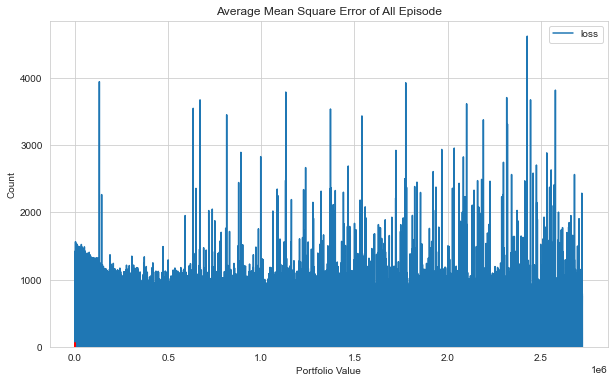

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

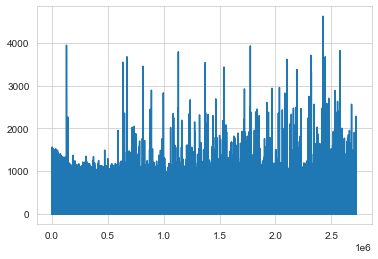

In [5]:
plt.plot(agent.model.losses)

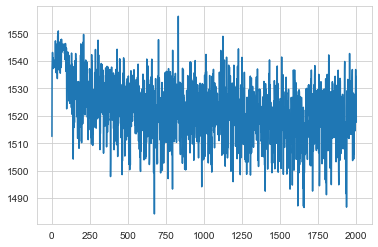

In [6]:
plt.plot(portfolio_value)

episode end value: 1002.00, duration: 0:00:00.242050
Sell: 682 times, Buy: 680 times


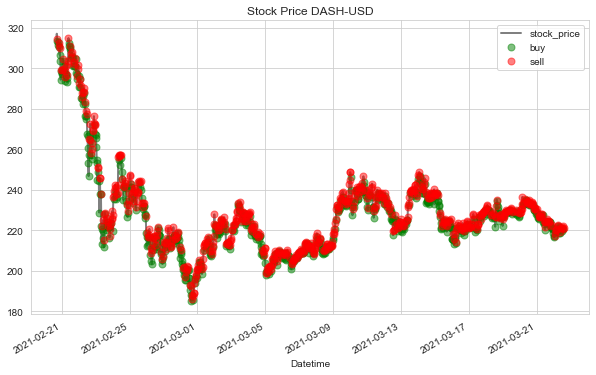

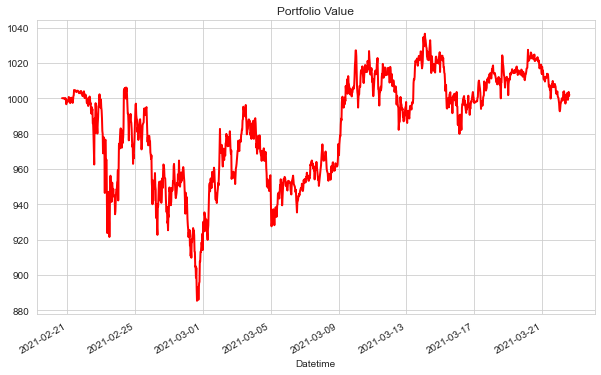

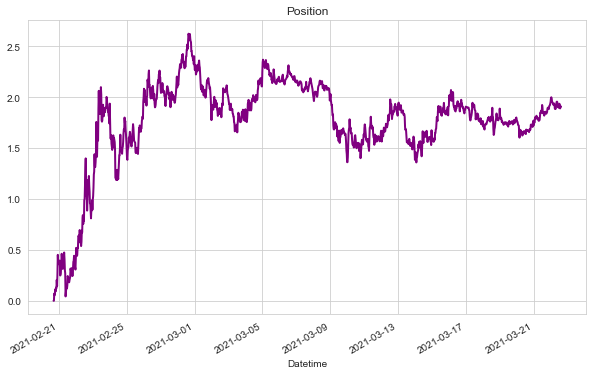

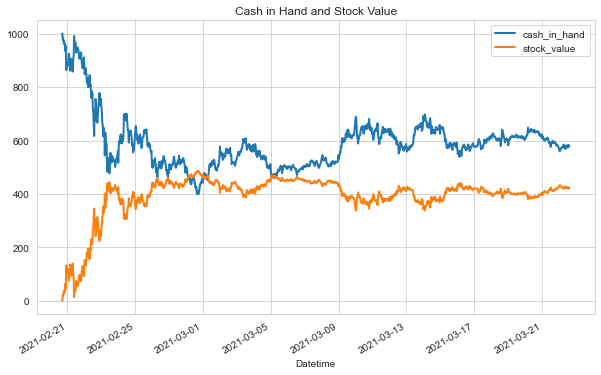

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DASH-USD
Start: 2021-02-20 16:30:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 0.04 %
Volatility: 0.0719
shape ratio: -0.1479
Maximun drawdown: -12.00 %
Calmar ratio: 0.0031
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -6.30 %
Volatility (benchmark): 0.1789
shape ratio: -0.4135
Maximun drawdown: -41.62 %
Calmar ratio (benchmark): -0.1513


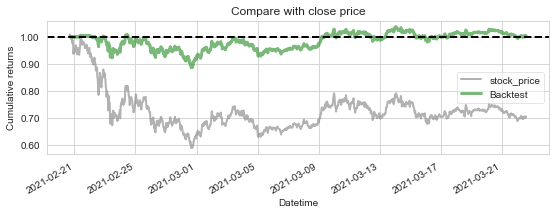

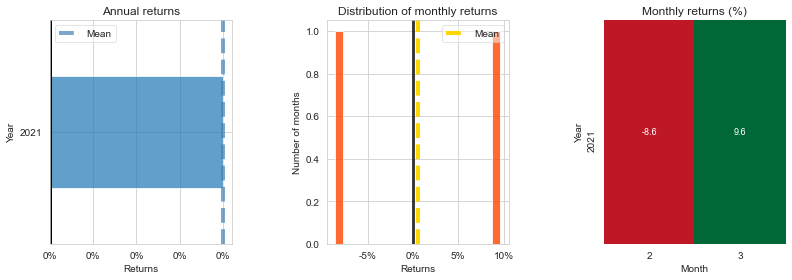

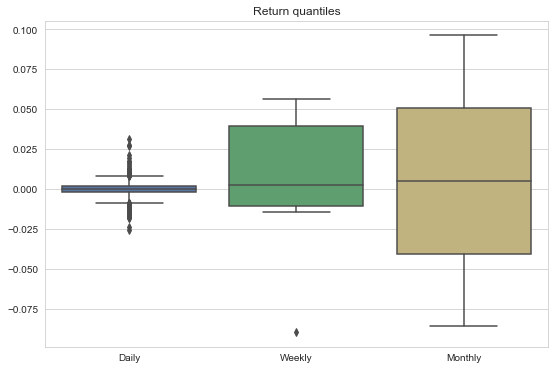

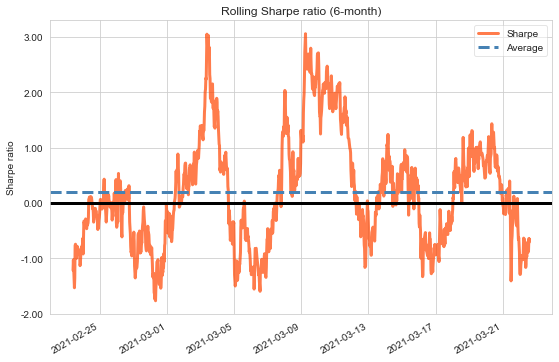

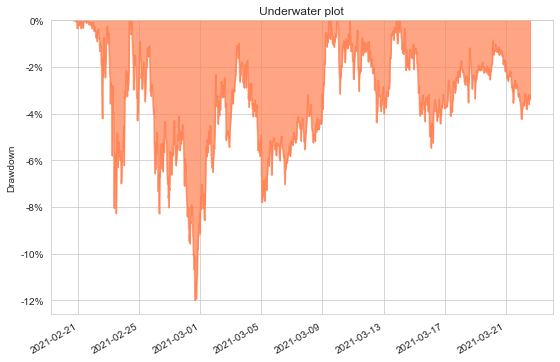

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')